<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Wage</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>Wage</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("Wage.csv")
df.head()
df.shape
df.dtypes

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


(3000, 12)

year            int64
age             int64
sex            object
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

<p>Is appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage


(0, 12)

<p>There are no obvious missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
# year: Year that wage information was recorded
# age: Age of worker
# maritl: A factor with levels 1. Never Married 2. Married 
#         3. Widowed 4. Divorced and 5. Separated indicating marital status
# race: A factor with levels 1. White 2. Black 3. Asian and 4. Other indicating race
# education: A factor with levels 1. < HS Grad 2. HS Grad 3. Some College 
#             4. College Grad and 5. Advanced Degree indicating education level
# region: Region of the country (mid-atlantic only)
# jobclass: A factor with levels 1. Industrial and 2. Information indicating type of job
# health: A factor with levels 1. <=Good and 2. >=Very Good indicating 
#         health level of worker
# health_ins: A factor with levels 1. Yes and 2. No indicating whether worker 
#             has health insurance
# logwage: Log of workers wage
# wage: Workers raw wage

df.columns = pd.MultiIndex.from_tuples([('quantitative', 'year'), ('quantitative', 'age'), 
                        ('categorical', 'sex'), ('categorical', 'maritl'), 
                        ('categorical', 'race'), ('categorical', 'education'), 
                        ('categorical', 'region'), ('categorical', 'jobclass'), 
                        ('categorical', 'health'), ('categorical', 'health_ins'), 
                        ('quantitative', 'logwage'), ('quantitative', 'wage')],
                        names=['type of variable', 'variable'])

df.head()

type of variable quantitative     categorical                              \
variable                 year age         sex            maritl      race   
0                        2006  18     1. Male  1. Never Married  1. White   
1                        2004  24     1. Male  1. Never Married  1. White   
2                        2003  45     1. Male        2. Married  1. White   
3                        2003  43     1. Male        2. Married  3. Asian   
4                        2005  50     1. Male       4. Divorced  1. White   

type of variable                                                       \
variable                education              region        jobclass   
0                    1. < HS Grad  2. Middle Atlantic   1. Industrial   
1                 4. College Grad  2. Middle Atlantic  2. Information   
2                 3. Some College  2. Middle Atlantic   1. Industrial   
3                 4. College Grad  2. Middle Atlantic  2. Information   
4                      2. HS Grad  2. Middle Atlantic  2. Information   

type of variable                            quantitative              
variable                  health health_ins      logwage        wage  
0                      1. <=Good      2. No     4.318063   75.043154  
1                 2. >=Very Good      2. No     4.255273   70.476020  
2                      1. <=Good     1. Yes     4.875061  130.982177  
3                 2. >=Very Good     1. Yes     5.041393  154.685293  
4                      1. <=Good     1. Yes     4.318063   75.043154

<p>Now we can create the data quality reports.</p>

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
'Quantitative Qualilty Report:'
df_qr_quantitative.round(2)
'Categorical Qualilty Report:'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
year,3000,0.0,7,2003.00,2004.00,2005.79,2006.00,2008.00,2009.00,2.03
age,3000,0.0,61,18.00,33.75,42.41,42.00,51.00,80.00,11.54
logwage,3000,0.0,508,3.00,4.45,4.65,4.65,4.86,5.76,0.35
wage,3000,0.0,508,20.09,85.38,111.70,104.92,128.68,318.34,41.73


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
sex,3000,0.0,1,1. Male,3000,100.00,NaN,NaN,NaN
maritl,3000,0.0,5,2. Married,2074,69.13,1. Never Married,648.0,21.60
race,3000,0.0,4,1. White,2480,82.67,2. Black,293.0,9.77
education,3000,0.0,5,2. HS Grad,971,32.37,4. College Grad,685.0,22.83
region,3000,0.0,1,2. Middle Atlantic,3000,100.00,None,NaN,NaN
jobclass,3000,0.0,2,1. Industrial,1544,51.47,2. Information,1456.0,48.53
health,3000,0.0,2,2. >=Very Good,2142,71.40,1. <=Good,858.0,28.60
health_ins,3000,0.0,2,1. Yes,2083,69.43,2. No,917.0,30.57


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each (quantitative) variable.</p>

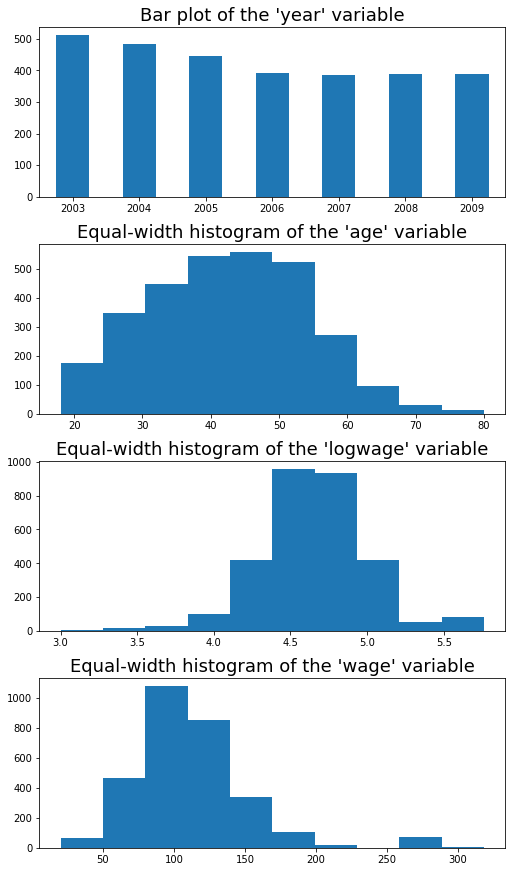

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

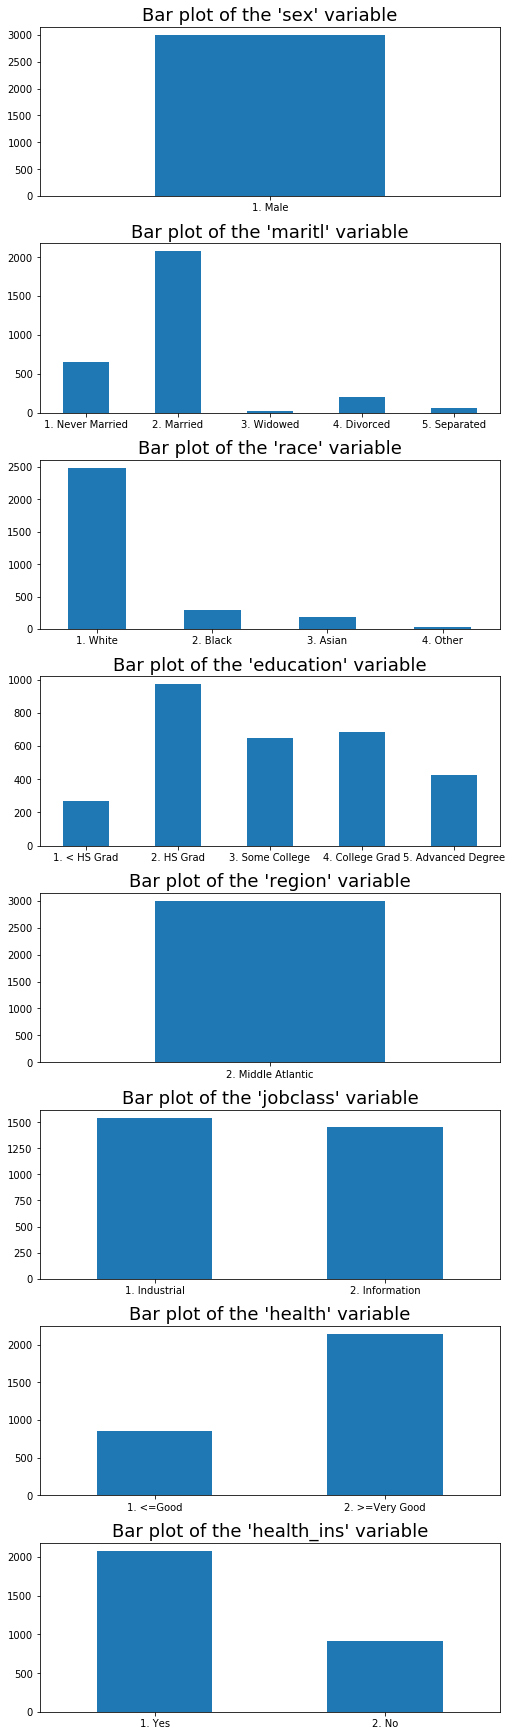

In [7]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)